In [1]:
from Functions_thesis import *
from Functions_plotting import *

#Paramters for config:
T = range(24)
LT=len(T)
eff = 0.9

PW_cap=300 #MWh

SOC_cap = 225 #MWh

P_DIS_CH = 75 #MWh
SOC_init = 0

problem_parameters = {'PW_cap':PW_cap,'SOC_cap':SOC_cap,'P_DIS_CH':P_DIS_CH,'SOC_init':SOC_init,'eff':eff}

n_var=4
n_constraints=11

variables = ['pCH','pDIS','pW','SOC']

Target = ['DA_DK2','windpower']

EQUAL1 = Traders_equality_one_uncertainty("Equality_one_uncertainty", T, problem_parameters, n_var, n_constraints,variables,Target)

reduced_features = ['DA_DE_Lag',
                    'DA_DK1_Lag',
                    'DA_DK2_Lag',
                    'DA_DK2_Q25',
                    'DA_DK2_Q50',
                    'DA_DK2_Q75',
                    'DA_DK2_mean',
                    'DA_NO2_Lag',
                    'ForecastDAOnshore_Wind_DK1',
                    'ForecastDAOnshore_Wind_DK2',
                    'RT_NO2_Lag',
                    'Scheduled_Gen_DA_DK2',
                    'max_wind_speed_10min_DK1',
                    'max_wind_speed_10min_DK2',
                    'max_wind_speed_3sec_DK1',
                    'max_wind_speed_3sec_DK2',
                    'mean_wind_speed_DK1',
                    'mean_wind_speed_DK2']

data, IDS, train_ID, test_ID, features, scaler = load_data('DataV4_shifted.pkl',EQUAL1,0.8,problem_parameters,False)

Number of training samples: 790
Number of test samples: 198
PW 1.0
P_DIS_CH 0.25
SOC_init 0.0
SOC_cap 0.75
Efficiency 0.9
Max DA: 871.0


In [2]:
dataset = dataset_creator(EQUAL1,data,IDS,reduced_features)

extract_train_data(EQUAL1,train_ID)
extract_test_data(EQUAL1,test_ID)

Set parameter Username


Academic license - for non-commercial use only - expires 2025-02-20
dataset complete
Features used: ['DA_DE_Lag', 'DA_DK1_Lag', 'DA_DK2_Lag', 'DA_DK2_Q25', 'DA_DK2_Q50', 'DA_DK2_Q75', 'DA_DK2_mean', 'DA_NO2_Lag', 'ForecastDAOnshore_Wind_DK1', 'ForecastDAOnshore_Wind_DK2', 'RT_NO2_Lag', 'Scheduled_Gen_DA_DK2', 'max_wind_speed_10min_DK1', 'max_wind_speed_10min_DK2', 'max_wind_speed_3sec_DK1', 'max_wind_speed_3sec_DK2', 'mean_wind_speed_DK1', 'mean_wind_speed_DK2']


Results from HPC - DA uncertain

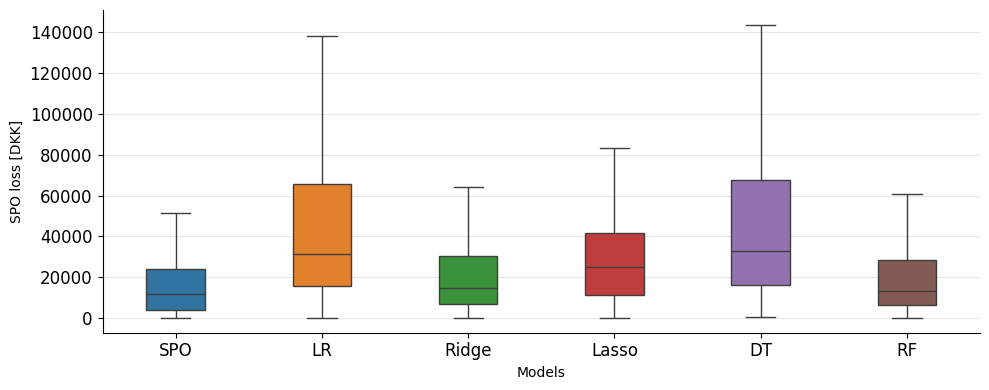

In [3]:
res = pd.read_pickle("Traders_Results_for_report\\tot_res_equal_da_uncertain.pkl")
gen_loss = res['gen_loss']
w_prediction = res['w_prediction']
prediction_spo = res['predictions_spo']
prediction_seq = res['predictions_sequential']
dual_prediction = res['dual_prediction']
sample_loss = res['sample_loss']
z_realised = res['z_realised']
B = res['B']
infeasibles = res['infeasibles']

# Define a mapping of old keys to new keys
key_mapping = {
    'SPO - Ridge - 0.5': 'SPO',
    'LR_seq': 'LR',
    'Ridge_seq': 'Ridge',
    'Lasso_seq': 'Lasso',
    'DT_seq': 'DT',
    'RF_seq': 'RF'
}

# Create a new dictionary with renamed keys
sample_loss = {key_mapping.get(k, k): v for k, v in sample_loss.items()}
infeasibles = {key_mapping.get(k, k): v for k, v in infeasibles.items()}

boxplot_spo_loss(sample_loss,infeasibles,False,False,(10,4),0.4,"Plots\eq_DA_uncertain_gen_loss_no_outliers")

res2 = pd.read_pickle("Traders_Results_for_report\\ori_formulation_da_uncertain.pkl")
z_train = res2['z_train']
z_test = res2['z_test']
w_train = res2['w_train']
w_test = res2['w_test']
c_train = res2['c_train']
c_test = res2['c_test']
scaler = res2['scaler']
DA_scaler = res2['DA_scaler']
Base_scaler = res2['Base_scaler']

In [5]:
np.mean(z_test*scaler)

-854134.7569635583

In [22]:
# EQUAL1 = Traders_equality_one_uncertainty(
#     "Equality_one_uncertainty_seq", T, problem_parameters, n_var, n_constraints, variables, Target)

# predictions_sequential, mse_sequential = sequential_models_v2(
#     EQUAL1, ['windpower'], data, train_ID, test_ID, features, [0.5, 0.1])

# # for model in prediction_seq.keys():
# #     for i in range(len(test_ID)):
# #         predictions_sequential[model]['windpower'][i] = np.array([max(0, x) for x in predictions_sequential[model]['windpower'][i]])    

# b_test_seq = np.array([EQUAL1.Vector_b(
#     predictions_sequential['LR_seq']['windpower'][i]) for i in range(len(test_ID))])
# EQUAL1.b_test_seq = b_test_seq

Results HPC - PW seq

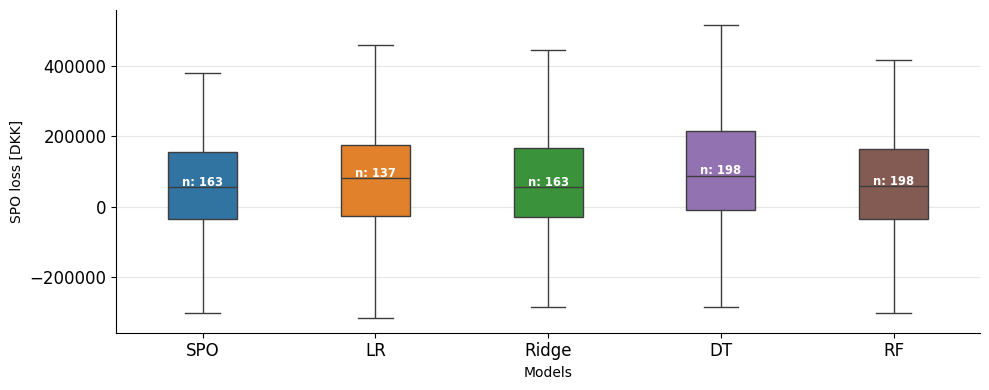

In [6]:
res = pd.read_pickle("Traders_Results_for_report\\tot_res_equal_pw_seq_ridge.pkl")
gen_loss = res['gen_loss']
w_prediction = res['w_prediction']
prediction_spo = res['predictions_spo']
prediction_seq = res['predictions_sequential']
dual_prediction = res['dual_prediction']
sample_loss = res['sample_loss']
z_realised = res['z_realised']
B = res['B']
infeasibles = res['infeasibles']

# Define a mapping of old keys to new keys
key_mapping = {
    'SPO - Ridge - 0.5': 'SPO',
    'LR_seq': 'LR',
    'Ridge_seq': 'Ridge',
    'Lasso_seq': 'Lasso',
    'DT_seq': 'DT',
    'RF_seq': 'RF'
}

# Create a new dictionary with renamed keys
sample_loss = {key_mapping.get(k, k): v for k, v in sample_loss.items()}
infeasibles = {key_mapping.get(k, k): v for k, v in infeasibles.items()}
w_prediction = {key_mapping.get(k, k): v for k, v in w_prediction.items()}
prediction_spo = {key_mapping.get(k, k): v for k, v in prediction_spo.items()}
prediction_seq = {key_mapping.get(k, k): v for k, v in prediction_seq.items()}
z_realised = {key_mapping.get(k, k): v for k, v in z_realised.items()}



del sample_loss['Lasso']
del infeasibles['Lasso'] 
del w_prediction['Target']
del w_prediction['Lasso']

#  Get the 'tab10' color palette
tab10_palette = sns.color_palette("tab10")
# Remove the 4th color (which is red)
updated_palette = tab10_palette[:3] + tab10_palette[4:]
# Set the updated palette as the default
sns.set_palette(updated_palette)
# sns.palplot(sns.color_palette()) 
boxplot_spo_loss(sample_loss,infeasibles,False,True,(10,4),0.4,"Plots\eq_pw_seq_ridge")

res2 = pd.read_pickle("Traders_Results_for_report\\ori_formulation_pw_seq_ridge.pkl")
z_train = res2['z_train']
z_test = res2['z_test']
w_train = res2['w_train']
w_test = res2['w_test']
c_train = res2['c_train']
c_test = res2['c_test']
scaler = res2['scaler']
DA_scaler = res2['DA_scaler']
Base_scaler = res2['Base_scaler']


gen_loss2={} #Without infeasible
for model in sample_loss.keys():
    loss = []
    for i in range(len(test_ID)):
        if infeasibles[model][i]==0:
            loss.append(sample_loss[model][i])
    gen_loss2[model]=np.mean(loss)

In [8]:
np.mean(z_realised['SPO'])

-731580.4030821052

Stochastic formulation

In [24]:
def stochastic_traders(config, train_ID, data):
    DA_scenarios = []
    PW_scenarios = []
    BAL_scenarios = []
    for i in range(len(train_ID)):
        DA_scenarios.append(config.dataset[i]['DA_DK2'])
        PW_scenarios.append(config.dataset[i]['windpower'])
        BAL_scenarios.append(data[data['ID']==train_ID[i]].RT_DK2.values/config.DA_scaler)

    # Problem
    T = config.T
    P_DIS_CH = config.P_DIS_CH
    SOC_init = config.SOC_init
    SOC_cap = config.SOC_cap
    eff = config.eff

    scenarios = train_ID
    n_scenarios = len(scenarios)
    prob = 1/n_scenarios
    K = range(n_scenarios)

    model = gp.Model("Stochastic model of Producers problem")
    model.Params.LogToConsole = 0
    p_w = model.addVars(T, vtype=GRB.CONTINUOUS, lb=0, name="windpower")
    p_ch = model.addVars(T, vtype=GRB.CONTINUOUS, lb=0, name="BESS charge")
    p_dis = model.addVars(T, vtype=GRB.CONTINUOUS, lb=0, name="BESS discharge")
    SOC = model.addVars(T, vtype=GRB.CONTINUOUS, lb=0, name="BESS SOC")
    Delta = model.addVars(K, T, vtype=GRB.CONTINUOUS,
                          lb=-GRB.INFINITY, name="Delta")

    model.setObjective(prob*gp.quicksum(DA_scenarios[k][t]*(
        p_w[t]+p_dis[t]) + BAL_scenarios[k][t]*Delta[k, t] for t in T for k in K), sense=GRB.MAXIMIZE)
    # Objective: Maximize expected profit from both DA and balancing market

    c1 = model.addConstrs((p_w[t]+p_ch[t] <= config.PW_cap for t in T))
    c2 = model.addConstrs(
        (p_ch[t] <= P_DIS_CH for t in T), name="Upper ch")
    c3 = model.addConstrs(
        (p_dis[t] <= P_DIS_CH for t in T), name="Upper dis")
    c4 = model.addConstr(
        (SOC[0] == SOC_init + eff * p_ch[0] - 1/eff * p_dis[0]), name="SOC 1")
    c5 = model.addConstrs((SOC[t] == SOC[t-1] + eff * p_ch[t] -
                           1/eff * p_dis[t] for t in range(1, len(T))), name="SOC t")
    c6 = model.addConstrs((SOC[t] <= SOC_cap for t in T), name="Upper SOC")

    c7 = model.addConstrs((Delta[k, t] == PW_scenarios[k][t] - (p_w[t]+p_ch[t])
                          for k in K for t in T), name="Delta constraint")

    # Optimize
    model.optimize()
    if model.status == GRB.OPTIMAL:
        print("Optimal")
        obj = model.ObjVal
        print(obj)
        p_w_res = np.array([p_w[t].x for t in T])
        p_ch_res = np.array([p_ch[t].x for t in T])
        p_dis_res = np.array([p_dis[t].x for t in T])
        SOC_res = np.array([SOC[t].x for t in T])
        Delta_res = []
        for k in K:
            Delta_res.append(np.array([Delta[k, t].x for t in T]))
        res_stochastic = {'z': obj,
                          'p_w': p_w_res,
                          'pCH': p_ch_res,
                          'pDIS': p_dis_res,
                          'SOC': SOC_res,
                          'Delta_res': Delta_res,
                          'infeasibles': 0}
    return res_stochastic

In [25]:
RT = pd.read_csv("RT_price.csv")
RT = RT.rename(columns={"HourUTC": "timestamp"})
RT['timestamp'] = pd.to_datetime(RT['timestamp'])
RT = RT.set_index("timestamp", drop=True)
RT = RT*7.45
data['RT_DK2'] = RT.loc[data.index, 'RT_DK2']

res = stochastic_traders(EQUAL1, train_ID, data)

pch_sto = res['pCH']
pdis_sto = res['pDIS']
pw_sto = res['p_w']
soc_sto = res['SOC']

w_sto = np.hstack((pch_sto,pdis_sto,pw_sto,soc_sto))*Base_scaler
w_stochastic = np.array([w_sto for i in range(len(test_ID))])
infeasibles_sto = np.zeros(len(test_ID))
infeasibles['Sto'] = infeasibles_sto
w_prediction['Sto']=w_stochastic

Optimal
0.856194701206678


In [26]:
z_realised_stochastic = []
loss_stochastic = []
for idx in range(len(test_ID)):
    # Calculate z_realised and loss for this sample
    DA_true = EQUAL1.dataset[test_ID[idx]]['DA_DK2']
    PW_true = EQUAL1.dataset[test_ID[idx]]['windpower']

    z_realised_val = - np.sum(DA_true * (pw_sto + pdis_sto))*EQUAL1.scaler
    z_realised_stochastic.append(z_realised_val)
    loss_stochastic.append(
        z_realised_val - EQUAL1.dataset[test_ID[idx]]['z']*EQUAL1.scaler)

gen_loss_stochastic = np.mean(loss_stochastic)

In [27]:
#Feasibility check:
check_decision = "pw_pch"
# model = 'SPO - Ridge - 2.5'
# check_decision = "pch"
i=0
infeasible_prediction=traders_feasibility_check(EQUAL1,w_prediction,check_decision,test_ID)

for model in infeasible_prediction.keys():
    print(f"{model}: {np.sum(infeasible_prediction[model])/len(infeasible_prediction[model])*100:.2f} %")
#Tilføj stochastics

SPO: 80.30 %
LR: 67.68 %
Ridge: 80.30 %
DT: 95.96 %
RF: 95.96 %
Sto: 100.00 %


In [31]:
Delta_tot = {}
RT_tot = {}
Balance_cost_tot = {}
idx = 3

# del w_prediction['Lasso']

for model in w_prediction.keys():
    Delta = []
    RT = []
    Balance_cost = []
    for idx in range(len(test_ID)):
        if infeasibles[model][idx]==0:
            pch = w_prediction[model][idx][:24]
            pw = w_prediction[model][idx][48:72]
            PW_true = EQUAL1.dataset[test_ID[idx]]['windpower']*EQUAL1.base_scaler
            RT_val = data[data['ID'] == test_ID[idx]].RT_DK2
            RT.append(RT_val)
            pDA_tot = pch+pw
            delta = PW_true-pDA_tot
            Delta.append(delta)
            bal_cost = np.sum(RT_val*delta)
            Balance_cost.append(bal_cost)
        else:
            Delta.append(np.zeros(24))
            RT.append(np.zeros(24))
            Balance_cost.append(0)
    Delta_tot[model]=np.array(Delta)
    RT_tot[model]=np.array(RT)
    Balance_cost_tot[model]=np.array(Balance_cost)

for model in Balance_cost_tot.keys():
    print(f"{model}: {np.mean(Balance_cost_tot[model])}")

print()
for model in Delta_tot.keys():
    print(f"{model}: {np.mean(abs(Delta_tot[model]))}")


SPO: 18068.066256195296
LR: 5412.916026165789
Ridge: 18068.066256195296
DT: 41776.419966972695
RF: 28430.276712437862
Sto: -1416281.0042855006

SPO: 14.917580411270519
LR: 14.549312844272398
Ridge: 14.917580411270519
DT: 29.12275470944641
RF: 20.16904889506016
Sto: 155.93356504151095


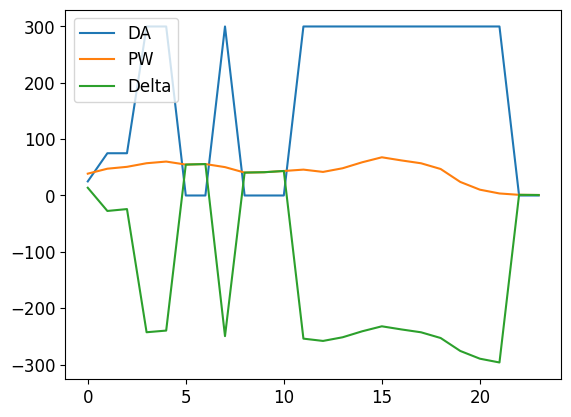

In [32]:
idx=2
pDA = w_prediction['Sto'][idx][:24]+w_prediction['Sto'][idx][48:72]
pReal = EQUAL1.dataset[test_ID[idx]]['windpower']*EQUAL1.base_scaler
Delta = pReal - pDA

plt.plot(pDA,label="DA")
plt.plot(pReal,label="PW")
plt.plot(Delta,label="Delta")
plt.legend()

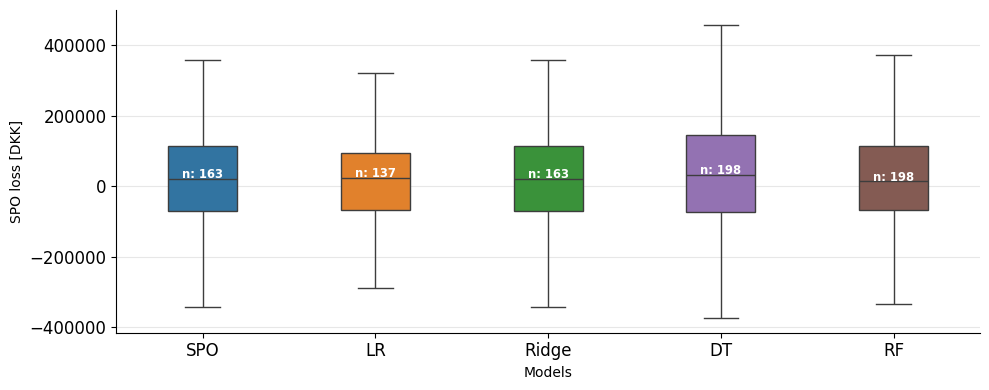

In [34]:
del Balance_cost_tot['Sto']
del infeasibles['Sto']

boxplot_spo_loss(Balance_cost_tot,infeasibles,False,True,(10,4),0.4)

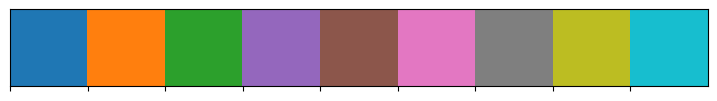

In [ ]:
sample_loss['SPO'][6]

In [ ]:
z_realised['SPO'][6]-z_test[6]*scaler

In [ ]:
plt.plot(-res2['b_test_seq'][6][48:72]*Base_scaler)
plt.plot(dataset[test_ID[6]]['windpower']*Base_scaler)

In [ ]:
plt.plot(w_prediction['SPO'][6])
plt.plot(w_prediction['Target'][6])

In [ ]:
res2['b_test_seq'][0][48:72]

In [ ]:
i=3
Oracle(res['predictions_spo']['SPO - Ridge - 0.5'][i],EQUAL1,EQUAL1.A,res2['b_test_seq'][i])

In [9]:
Target_w_pred = w_prediction['Target']
del w_prediction['Target']

In [10]:
res = pd.read_pickle("tot_res_equal_pw_seq_trial.pkl")
gen_loss = res['gen_loss']
w_prediction = res['w_prediction']
prediction_spo = res['predictions_spo']
prediction_seq = res['predictions_sequential']
dual_prediction = res['dual_prediction']
sample_loss = res['sample_loss']
z_realised = res['z_realised']
B = res['B']
infeasibles = res['infeasibles']

In [11]:
res2 = pd.read_pickle("ori_formulation_pw_seq_trail.pkl")
z_train = res2['z_train']
z_test = res2['z_test']
w_train = res2['w_train']
w_test = res2['w_test']
c_train = res2['c_train']
c_test = res2['c_test']
scaler = res2['scaler']
DA_scaler = res2['DA_scaler']
Base_scaler = res2['Base_scaler']
b_test_seq = res2['b_test_seq']

In [ ]:
i=16
plt.plot(-b_test_seq[i][48:72])
plt.plot(prediction_seq['LR_seq']['windpower'][i])

In [62]:
RT = pd.read_csv("RT_price.csv")
RT = RT.rename(columns={"HourUTC": "timestamp"})
RT['timestamp'] = pd.to_datetime(RT['timestamp'])
RT = RT.set_index("timestamp", drop=True)
data['RT_DK2'] = RT.loc[data.index, 'RT_DK2']

Delta_tot = {}
RT_tot = {}
Balance_cost_tot = {}
idx = 3

for model in w_prediction.keys():
    Delta = []
    RT = []
    Balance_cost = []
    for idx in range(len(test_ID)):
        if infeasibles[model][idx]==0:
            pch = w_prediction[model][idx][:24]
            pw = w_prediction[model][idx][48:72]
            PW_true = EQUAL1.dataset[test_ID[idx]]['windpower']*EQUAL1.base_scaler
            RT_val = data[data['ID'] == test_ID[idx]].RT_DK2
            RT.append(RT_val)
            pDA_tot = pch+pw
            delta = PW_true-pDA_tot
            Delta.append(delta)
            bal_cost = np.sum(RT_val*delta)
            Balance_cost.append(bal_cost)
    Delta_tot[model]=np.array(Delta)
    RT_tot[model]=np.array(RT)
    Balance_cost_tot[model]=np.array(Balance_cost)

In [ ]:
def RT_market_producers(config, data, test_ID, predictions_spo, predictions_sequential):

    Delta_tot = {}
    RT_tot = {}
    Balance_cost_tot = {}

    for model in predictions_spo.keys():
        Delta = []
        RT = []
        Balance_cost = []

        for i in range(len(test_ID)):
            PW_pred = predictions_spo[model][i][2 *
                                                24:3*24]/predictions_spo[model][i][24:2*24]
            PW_true = config.dataset[test_ID[i]]['windpower']

            Delta_val = (PW_true - PW_pred)*config.base_scaler
            RT_val = data[data['ID'] == test_ID[i]].RT_DK2
            Balance_cost_val = np.sum(Delta_val*RT_val)

            Delta.append(Delta_val)
            RT.append(RT_val)
            Balance_cost.append(Balance_cost_val)

        Delta_tot[model] = Delta
        RT_tot[model] = RT
        Balance_cost_tot[model] = Balance_cost

    for model in predictions_sequential.keys():
        Delta = []
        RT = []
        Balance_cost = []
        for i in range(len(test_ID)):
            PW_pred = predictions_sequential[model]['windpower'][i]
            PW_true = config.dataset[test_ID[i]]['windpower']
            Delta_val = (PW_true - PW_pred)*config.base_scaler
            RT_val = data[data['ID'] == test_ID[i]].RT_DK2
            Balance_cost_val = np.sum(Delta_val*RT_val)

            Delta.append(Delta_val)
            RT.append(RT_val)
            Balance_cost.append(Balance_cost_val)

        Delta_tot[model] = Delta
        RT_tot[model] = RT
        Balance_cost_tot[model] = Balance_cost

    return Delta_tot, RT_tot, Balance_cost_tot

In [23]:
# # res = pd.read_pickle("Traders_Results_for_report\\tot_res_equal_pw_seq.pkl")
# gen_loss = res['gen_loss']
# w_prediction = res['w_prediction']
# prediction_spo = res['predictions_spo']
# prediction_seq = res['predictions_sequential']
# dual_prediction = res['dual_prediction']
# sample_loss = res['sample_loss']
# z_realised = res['z_realised']
# B = res['B']
# infeasibles = res['infeasibles']

# # Define a mapping of old keys to new keys
# key_mapping = {
#     'SPO - Ridge - 0.5': 'SPO',
#     'LR_seq': 'LR',
#     'Ridge_seq': 'Ridge',
#     'Lasso_seq': 'Lasso',
#     'DT_seq': 'DT',
#     'RF_seq': 'RF'
# }

# # Create a new dictionary with renamed keys
# sample_loss = {key_mapping.get(k, k): v for k, v in sample_loss.items()}
# infeasibles = {key_mapping.get(k, k): v for k, v in infeasibles.items()}

# del sample_loss['Lasso']
# del infeasibles['Lasso']

# boxplot_spo_loss(sample_loss,infeasibles,False,True,(10,4),0.4,"Plots\eq_ori_gen_loss_pw_seq_no_outliers")

# # res2 = pd.read_pickle("Traders_Results_for_report\\ori_formulation_pw_seq.pkl")
# z_train = res2['z_train']
# z_test = res2['z_test']
# w_train = res2['w_train']
# w_test = res2['w_test']
# c_train = res2['c_train']
# c_test = res2['c_test']
# scaler = res2['scaler']
# DA_scaler = res2['DA_scaler']
# Base_scaler = res2['Base_scaler']

In [ ]:
# plt.plot(prediction_seq['LR_seq']['windpower'][0])

In [39]:
# DA_pred = prediction_seq['LR_seq']['DA_DK2'][0]
# PW_pred = prediction_seq['LR_seq']['windpower'][0]

# res = producers_problem_standard_form_equality(EQUAL1, DA_pred, PW_pred)

In [ ]:
# # reduced_features = ['mean_wind_speed_DK2','DA_DK2_Lag','mean_temp_DK2']
# dataset = dataset_creator(EQUAL1,data,IDS,reduced_features)

# extract_train_data(EQUAL1,train_ID)
# extract_test_data(EQUAL1,test_ID)

Only DA uncertain

In [ ]:
regu = ['Ridge',0.5,0.1]
gen_loss, w_prediction, predictions_spo, predictions_sequential, dual_prediction, sample_loss, z_realised, B, infeasibles=spo_framework_v2(EQUAL1,data,IDS,train_ID,test_ID,reduced_features,True,regularisation=regu)

boxplot_spo_loss(sample_loss,infeasibles)

In [ ]:
#Feasibility check:
check_decision = "pw_pch"
# model = 'SPO - Ridge - 2.5'
check_decision = "pch"
i=0
infeasible_prediction=traders_feasibility_check(EQUAL1,w_prediction,check_decision,test_ID)
infeasible_prediction

i=3
plt.plot(w_prediction['SPO - Ridge - 0.5'][i],label="SPO")
plt.plot(w_prediction['RF_seq'][i],label="RF")
plt.plot(w_prediction['Target'][i],label="Target")
plt.legend()

# Delta_tot, RT_tot, Balance_cost_tot = RT_market_producers(EQUAL1,data,test_ID,predictions_spo,predictions_sequential)
# boxplot_spo_loss(Balance_cost_tot,infeasibles,False)

PW from sequential model

In [ ]:
predictions_sequential, mse_sequential = sequential_models_v2(
    EQUAL1, ['windpower'], data, train_ID, test_ID, features, [0.5,0.1])

for model_name in mse_sequential.keys():
    print(f"{model_name}: {np.mean(mse_sequential[model_name]['windpower'])}")

b_test_seq=np.array([EQUAL1.Vector_b(predictions_sequential['Ridge_seq']['windpower'][i]) for i in range(len(test_ID))])


In [ ]:
EQUAL1 = Traders_equality_one_uncertainty("Equality_one_uncertainty_seq", T, problem_parameters, n_var, n_constraints,variables,Target)
data, IDS, train_ID, test_ID, features, scaler = load_data('DataV4_shifted.pkl',EQUAL1,0.8,problem_parameters,True)
EQUAL1.b_test_seq = b_test_seq

# regu = [None,2.5,0.1]
regu = None
gen_loss, w_prediction, predictions_spo, predictions_sequential, dual_prediction, sample_loss, z_realised, B, infeasibles=spo_framework_v2(EQUAL1,data,IDS,train_ID,test_ID,reduced_features,True,regularisation=regu)


infeasibles

boxplot_spo_loss(sample_loss,infeasibles)

# del sample_loss['Lasso_seq']

# boxplot_spo_loss(sample_loss,infeasibles,False)

In [ ]:
(z_realised['SPO'][0]-z_realised['Target'][0])

In [ ]:
sample_loss['SPO'][0]

In [21]:
# Check z values are both in same size order

Clustering for framework_v2

In [ ]:
# reduced_features = ['DA_DK2_Q25', 'DA_DK2_Q50', 'windpower_mean']
# cluster_target=['windpower','DA_DK2']

cluster_target = ['windpower']

method = "Kmeans_SK"
# method = "Kmeans_TS"
# method = "Manual"

#Levels depending on target
manual_levels = [data['windpower'].quantile(0.25),data['windpower'].quantile(0.50),data['windpower'].quantile(0.75)]
manual_levels = [data['DA_DK2'].quantile(0.25),data['DA_DK2'].quantile(0.50),data['DA_DK2'].quantile(0.75)]

#N clusters if kmeans
n_clusters = 2

plot = True

regularisation = ['Ridge',0.5,0.1]

clustering_res = Clustering_experiment(EQUAL1,data,IDS,train_ID,test_ID,reduced_features,regularisation,cluster_target,method,n_clusters,manual_levels,plot=True)

In [ ]:
clustering_res['Cluster 2']['gen_loss']

In [ ]:
# def spo_framework(config, data, IDS, train_ID, test_ID, plot_result, features, regularization=None):
# return gen_loss_dict, w_preds, c_predictions, dual_preds, loss_dict, z_preds, B, count_infeasibles


In [ ]:
# def spo_framework_v2(config, data, IDS, train_ID, test_ID, features, plot_res=False, regularisation=None)
# return gen_loss, w_prediction, predictions_spo, predictions_sequential, dual_prediction, sample_loss, z_realised, B, infeasibles

In [26]:
res = pd.read_pickle("Traders_CV results\\known_uncertainty\\v2\\SequentialPW.pkl")

In [ ]:
plt.plot(res['w_prediction']['SPO - Ridge - 2.5'][2]*EQUAL1.base_scaler)
plt.plot(res['w_prediction']['RF_seq'][2])

In [ ]:
data

In [ ]:
i=19
plt.plot(res['predictions_sequential']['RF_seq']['windpower'][i]*EQUAL1.base_scaler,label="RF")
plt.plot(res['predictions_sequential']['Ridge_seq']['windpower'][i]*EQUAL1.base_scaler,label="Ridge")
plt.plot(res['predictions_sequential']['LR_seq']['windpower'][i]*EQUAL1.base_scaler,label="LR")
plt.plot(EQUAL1.dataset[test_ID[i]]['windpower']*EQUAL1.base_scaler,label="True")
plt.legend()

In [120]:
losses = res['sample_loss']
infeasibles = res['infeasibles']

In [ ]:
boxplot_spo_loss(losses,infeasibles)

In [ ]:
res.keys()

In [25]:
B_known=res['B']